In [24]:
#Feature engineering is the art of transforming raw data into meaningful features that can improve the performance of machine learning models
#Feature engineering can:
#Improve Model Performance: Well-engineered features can help your models generalize better, leading to higher accuracy.
#Reduce Overfitting: Carefully crafted features can make your models more robust and less prone to overfitting.
#Enhance Interpretability: Creating meaningful features can provide insights into how your model is making predictions.
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv('column_2C_weka.csv')
missingvalues = df.isnull().sum()
print(missingvalues)


pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [26]:
# 7 ways to handle missing values in the dataset
# Deleting Rows with missing values
# Impute missing values for continuous variable
# Impute missing values for categorical variable
# Other Imputation Methods
# Using Algorithms that support missing values
# Prediction of missing values
# Imputation using Deep Learning Library — Datawig

<Axes: >

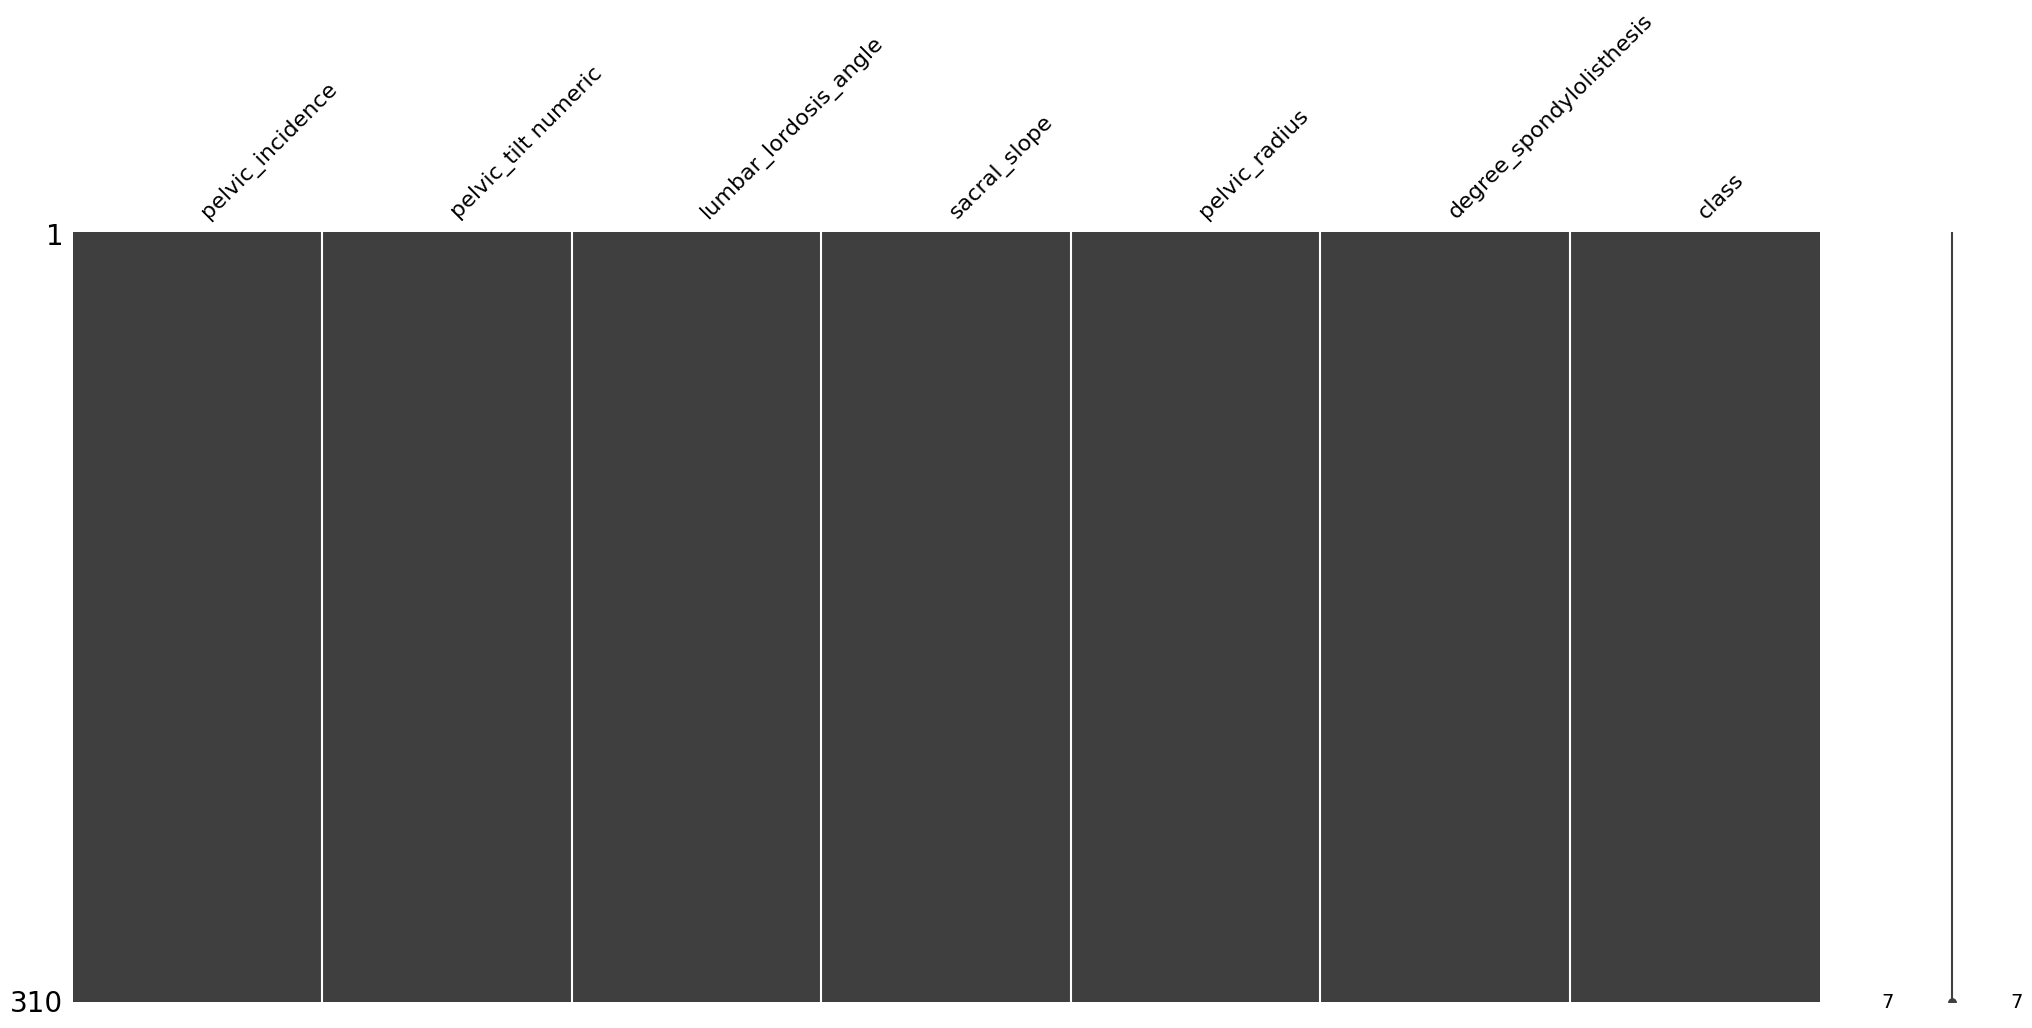

In [27]:
!pip install missingno
import missingno as msno
msno.matrix(df)
#Visualization of Missing Values: white lines denote the presence of missing value

In [28]:
#Delete Rows with Missing Values:
df.dropna(inplace = True)
print(df.isnull().sum())
print(df.shape)
# Pros:
# A model trained with the removal of all missing values creates a robust model.

# Cons:
#Loss of a lot of information.
#Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
(310, 7)


In [29]:
#Impute missing values with Mean/Median:

#You can fill missing values with a specific number, the mean, median, or even create a binary column indicating whether a value was missing.
# Fill missing values with the mean
df['pelvic_incidence'] = df['pelvic_incidence'].fillna(df['pelvic_incidence'].mean())

# Pros:
#Prevent data loss which results in deletion of rows or columns
#Works well with a small dataset and is easy to implement.

# Cons:
#Works only with numerical continuous variables.
#Can cause data leakage
#Do not factor the covariance between features.

In [30]:
# Imputation method for categorical columns:
# When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category.
df['class'] = df['class'].fillna('U')

# Pros:
#Prevent data loss which results in deletion of rows or columns
#Works well with a small dataset and is easy to implement.
#Negates the loss of data by adding a unique category

# Cons:
#Works only with categorical variables.
#Addition of new features to the model while encoding, which may result in poor performance

In [31]:
#For example, for the data variable having longitudinal behavior, it might make sense to use the last valid observation to fill the missing value. This is known as the Last observation carried forward (LOCF) method.
#For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

In [32]:
#Using Algorithms that support missing values:
#The k-NN algorithm can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction. These algorithms can be used when the dataset contains null or missing values.
#Another algorithm that can be used here is RandomForest that works well on non-linear and categorical data. It adapts to the data structure taking into consideration the high variance or the bias, producing better results on large datasets.

#Pros:
#No need to handle missing values in each column as ML algorithms will handle them efficiently.

#Cons:
#No implementation of these ML algorithms in the scikit-learn library.

In [33]:
## Create a binary column for missing values
df['has_missing_pelvic_incidence'] = df['pelvic_incidence'].isnull().astype(int)
print(df['has_missing_pelvic_incidence'])

0      0
1      0
2      0
3      0
4      0
      ..
305    0
306    0
307    0
308    0
309    0
Name: has_missing_pelvic_incidence, Length: 310, dtype: int64


In [34]:
# One-hot encoding

#One-hot encoding is a common preprocessing technique used when working with categorical data in machine learning. It serves two key purposes:
#A) Converting categorical values into numeric vectors that algorithms like neural networks and regression can understand. Many models require numeric input.
#B) Representing categorical values in a way that captures their uniqueness. Without one-hot encoding, algorithms may incorrectly treat different categories as the same value.

# Veri kümesindeki kategorik değişkenler one-hot encoding ile sayısal formata dönüştürülür ve bu dönüştürülmüş veri kullanılarak makine öğrenimi modelleri eğitilebilir.
df_encoded = pd.get_dummies(df, columns=['class'], prefix = 'class',drop_first=True)
df_encoded['class_Normal'] = df_encoded['class_Normal'].astype(int)
print(df_encoded)


     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  \
0       40.475232      98.672917                 -0.254400   
1       28.995960     114.405425               

In [35]:
# Label encoding
#Çoğu makine öğrenimi algoritması sayısal girdilerle daha iyi çalışır. Ancak, dikkat edilmesi gereken önemli bir nokta, sayısal dönüşümün gerçekten gerekliliğidir.
# Label encoding is suitable for categorical data where there is an inherent order or ranking among the categories.
# In cases where the categorical variables are nominal or lack a meaningful order, techniques like one-hot encoding or ordinal encoding may be more appropriate.
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])
print(df[['class', 'class_encoded']])

        class  class_encoded
0    Abnormal              0
1    Abnormal              0
2    Abnormal              0
3    Abnormal              0
4    Abnormal              0
..        ...            ...
305    Normal              1
306    Normal              1
307    Normal              1
308    Normal              1
309    Normal              1

[310 rows x 2 columns]


In [36]:

#Özellik ölçeklendirme, makine öğreniminde bağımsız değişken veya özellik aralığının normalleştirildiği çok önemli bir ön işleme adımıdır. Birçok makine öğrenimi algoritmasında, daha geniş aralıklara sahip özellikler amaç fonksiyonuna hakim olabilir ve bu da performansın düşmesine neden olabilir. Özellik ölçeklendirme, her özelliğin sonuca eşit katkıda bulunmasını sağlayarak bu durumu hafifletmeye yardımcı olur.

#Özellik ölçeklendirmenin birkaç yaygın yöntemi vardır:

#Min-Maks Ölçeklendirme (Normalleştirme) : Bu teknik, verileri genellikle 0'dan 1'e kadar sabit bir aralığa ölçeklendirir.
#Standardizasyon (Z-skoru Normalizasyonu) : Bu yöntem, verileri ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir.
#Sağlam Ölçeklendirme : Bu teknik standardizasyona benzer ancak ölçeklendirme için medyan ve çeyrekler arası aralığı (IQR) kullanır. Aykırı değerlere karşı daha az duyarlıdır.
#MaxAbs Ölçeklendirme : Bu, her özelliği maksimum mutlak değerine göre ölçeklendirir ve sonuçta [-1, 1] aralığı elde edilir.

In [37]:
#Kategorik verileri ölçeklendirmek yerine, öncelikle onları sayısal değerlere dönüştürmek daha mantıklı olacaktır.
#Eğer sütun bir hedef değişkeni değilse, yani tahminlemek istediğiniz bir şey değilse, çıkarılması genellikle en iyi seçenektir.
#Ancak, eğer bu sütun bir hedef değişkeniyse, yani tahminlemek istediğiniz bir şeyse, o zaman onu dönüştürmeniz gerekir.
df['class'] = df['class'].apply(lambda x: 0 if x == 'Abnormal' else 1)
df

from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Min-Max Scaled Data:")
print(scaled_df)

Min-Max Scaled Data:
     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.355688             0.519900               0.229180   
1            0.124501             0.296783               0.098578   
2            0.411666             0.513932               0.322995   
3            0.416151             0.557414               0.271260   
4            0.227272             0.289479               0.128129   
..                ...                  ...                    ...   
305          0.209822             0.360293               0.196881   
306          0.268009             0.487194               0.136211   
307          0.340438             0.522443               0.287897   
308          0.184257             0.272352               0.246846   
309          0.074202             0.207709               0.202620   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0        0.250857       0.307461                  0.025148    0.0   
1        0.1

In [38]:
# 2. Standardization (Z-score Normalization)
# Standardization (Z-score Normalization): This method scales the data so that it has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler() # Bu işlem, veri setindeki gelir bilgisini belirli bir ortalama ve standart sapma kullanarak standart normal dağılıma dönüştürmeye yarar.
df['incidence_scaled'] = scaler.fit_transform(df[['pelvic_incidence']]) #Önce fit yöntemi ile veri kümesinin istatistiklerini (ortalama ve standart sapma) hesaplar, sonra bu istatistikleri kullanarak veriyi dönüştürür.
print(df) #. Bu değerler, orijinal gelir değerlerinin ortalama ve standart sapmaya göre ne kadar uzakta olduğunu gösterir ve genellikle ortalama 0 ve standart sapma 1 olacak şekilde dönüştürülür.

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0       40.475232      98.672917                 -0.254400      0   
1       28.995960     114.405425 

In [39]:
#3. Robust Scaling
#This technique is similar to standardization but uses the median and the interquartile range (IQR) for scaling. It is less sensitive to outliers.
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame(df)

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.163978             0.540882              -0.382819   
1           -0.742382            -0.549770              -0.944116   
2            0.383440             0.511711               0.020377   
3            0.401021             0.724260              -0.201968   
4           -0.339473            -0.585473              -0.817115   
..                ...                  ...                    ...   
305         -0.407884            -0.239319              -0.521631   
306         -0.179764             0.381008              -0.782379   
307          0.104190             0.553313              -0.130463   
308         -0.508112            -0.669197              -0.306895   
309         -0.939578            -0.985190              -0.496968   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0       -0.099731      -1.327729                 -0.302955    0.0   
1       -0.693013      -0.261731 

In [40]:
#4. MaxAbs Scaling
#This scales each feature by its maximum absolute value, resulting in a range of [-1, 1].
from sklearn.preprocessing import MaxAbsScaler

df = pd.DataFrame(df)

scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.485449             0.456236               0.315002   
1            0.300822             0.203533               0.198941   
2            0.530154             0.449477               0.398372   
3            0.533735             0.498724               0.352397   
4            0.382895             0.195260               0.225202   
..                ...                  ...                    ...   
305          0.368960             0.275464               0.286300   
306          0.415428             0.419193               0.232384   
307          0.473270             0.459116               0.367182   
308          0.348543             0.175861               0.330701   
309          0.260653             0.102646               0.291399   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0        0.333323       0.605092                 -0.000608    0.0   
1        0.238788       0.701568 

In [41]:
#Min-Max Scaling is useful when you know the bounds of your data and when the distribution is not Normal.
#Standardization is preferred when the data follows a Gaussian distribution (or normal distribution).
#Robust Scaling is beneficial when the data contains outliers, as it uses the median and IQR which are robust to outliers.
#MaxAbs Scaling is useful when the data is already centered around zero and you want to maintain sparsity in sparse data sets.


# More information about why we should use Feature Scaling


#- The coefficients of linear models are influenced by the scale of the variable.
#- Variables with bigger magnitude dominate over those with smaller magnitude
#- Gradient descent converges much faster on scaled data
#- Feature scaling decrease the time to find support vectors for SVMs
#- Euclidean distances are sensitive to feature magnitude.
#- PCA require the features to be centered at 0.
#- compute data


#The machine learning models affected by the feature scale are:
#- Linear and Logistic Regression
#- Neural Networks
#- Support Vector Machines
#- KNN
#- K-means clustering
#- Principal Component Analysis (PCA)

In [42]:
# Creating Interaction Features
df['incidence_radius_ratio'] = df['pelvic_incidence'] / df['pelvic_radius']
print(df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0       40.475232      98.672917                 -0.254400      0   
1       28.995960     114.405425 

In [43]:
#Binning

bins = [0, 25, 50, 100, 150]
labels = ['<25', '25-50', '50-100', '150+']
df['incidence_group'] = pd.cut(df['pelvic_incidence'], bins=bins, labels=labels)
print(df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  \
0       40.475232      98.672917                 -0.254400      0   
1       28.995960     114.405425 

In [44]:
#By applying these techniques, you can unlock the full potential of your data and build more accurate machine learning models.
#Remember, there’s no one-size-fits-all approach to feature engineering. Experiment with different techniques, and let your data guide you towards creating features that make your models shine.
# Bunları yaptığımızda modelin doğru tahmin oranını artırırız.
# Dataları round ettiğimizde daha hızlı çalışmasını sağlayabiliriz.